In [70]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [71]:
df = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,MonthlyRate/Income
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,80,0,8,0,1,6,4,0,5,3.250292
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,80,1,10,3,3,10,7,1,7,4.855166
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,80,0,7,3,3,0,0,0,0,1.146411
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,80,0,8,3,3,8,7,3,0,7.961155
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,80,1,6,3,3,2,2,2,2,4.795848


In [72]:
df.columns.tolist()

['Age',
 'Attrition',
 'BusinessTravel',
 'DailyRate',
 'Department',
 'DistanceFromHome',
 'Education',
 'EducationField',
 'EmployeeCount',
 'EmployeeNumber',
 'EnvironmentSatisfaction',
 'Gender',
 'HourlyRate',
 'JobInvolvement',
 'JobLevel',
 'JobRole',
 'JobSatisfaction',
 'MaritalStatus',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'Over18',
 'OverTime',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StandardHours',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager',
 'MonthlyRate/Income']

In [73]:
from sklearn.preprocessing import LabelEncoder

LE = LabelEncoder()
df['BusinessTravel'] = LE.fit_transform(df['BusinessTravel'])
df['Department'] = LE.fit_transform(df['Department'])
df['Gender'] = LE.fit_transform(df['Gender'])
df['JobRole'] = LE.fit_transform(df['JobRole'])
df['MaritalStatus'] = LE.fit_transform(df['MaritalStatus'])
df['Over18'] = LE.fit_transform(df['Over18'])
df['OverTime'] = LE.fit_transform(df['OverTime'])
df['Attrition'] = LE.fit_transform(df['Attrition'])
df['EducationField'] = LE.fit_transform(df['EducationField'])

In [74]:
y = df['Attrition']
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Attrition, dtype: int64

In [75]:
x = df.drop(columns=['Over18', 'Attrition', 'EmployeeCount', 'EmployeeNumber', 'YearsAtCompany', 'JobLevel', 'PerformanceRating', 'YearsWithCurrManager', 'StandardHours'], axis='columns')
x.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,OverTime,PercentSalaryHike,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsInCurrentRole,YearsSinceLastPromotion,MonthlyRate/Income
0,41,2,1102,2,1,2,1,2,0,94,...,1,11,1,0,8,0,1,4,0,3.250292
1,49,1,279,1,8,1,1,3,1,61,...,0,23,4,1,10,3,3,7,1,4.855166
2,37,2,1373,1,2,2,4,4,1,92,...,1,15,2,0,7,3,3,0,0,1.146411
3,33,1,1392,1,3,4,1,4,0,56,...,1,11,3,0,8,3,3,7,3,7.961155
4,27,2,591,1,2,1,3,1,1,40,...,0,12,4,1,6,3,3,2,2,4.795848


In [76]:
xt, xtt, yt, ytt = train_test_split(x, y, test_size=0.2, random_state=69)


In [77]:
from sklearn.model_selection import GridSearchCV
LR = {'criterion':['gini', 'entropy', 'log_loss'],
    'max_depth':[8, 9, 10], 
    'n_estimators':[5, 6, 8],
    'max_leaf_nodes':[10, 9, 8],
    'min_impurity_decrease':[0.0, 0.01, 0.02],
    }
tuning = GridSearchCV(estimator=RandomForestClassifier(), param_grid = LR)
tuning.fit(xt, yt)
tuning.best_params_, tuning.best_score_

({'criterion': 'entropy',
  'max_depth': 9,
  'max_leaf_nodes': 9,
  'min_impurity_decrease': 0.01,
  'n_estimators': 5},
 np.float64(0.8605301117922828))

In [ ]:
model=RandomForestClassifier(criterion='gini', max_depth=9, max_leaf_nodes=9,
                            min_impurity_decrease=0.1, n_estimators=5)
model.fit(xt, yt)

RandomForestClassifier(max_depth=10, max_leaf_nodes=9, n_estimators=5)

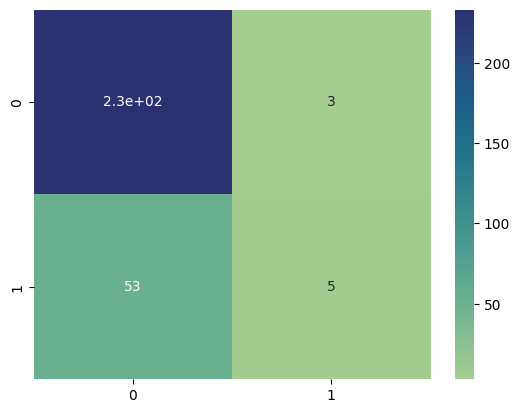

In [79]:
import matplotlib.pyplot as plt

y_predicted=model.predict(xtt)
cm=confusion_matrix(ytt, y_predicted)

sns.heatmap(cm, cmap="crest", annot=True)
plt.show()

In [80]:
from sklearn.model_selection import cross_val_score
results = cross_val_score(model, x, y)
results

array([0.83673469, 0.83673469, 0.84353741, 0.8537415 , 0.85034014])

(27, 27)
(7, 7)
[[ 1.00000000e+00  2.47514342e-02  1.06609426e-02 -3.18822833e-02
  -1.68612015e-03  2.08033731e-01 -4.08728481e-02]
 [ 2.47514342e-02  1.00000000e+00 -4.08603393e-03 -9.04357124e-03
  -2.44694416e-02  7.56933100e-04  2.37238290e-02]
 [ 1.06609426e-02 -4.08603393e-03  1.00000000e+00  7.10871369e-03
  -4.98533735e-03 -1.68064332e-02  3.77092287e-02]
 [-3.18822833e-02 -9.04357124e-03  7.10871369e-03  1.00000000e+00
   1.72248036e-02  7.99642205e-03  1.37195021e-02]
 [-1.68612015e-03 -2.44694416e-02 -4.98533735e-03  1.72248036e-02
   1.00000000e+00  2.10418256e-02  2.01345316e-03]
 [ 2.08033731e-01  7.56933100e-04 -1.68064332e-02  7.99642205e-03
   2.10418256e-02  1.00000000e+00 -3.95921504e-02]
 [-4.08728481e-02  2.37238290e-02  3.77092287e-02  1.37195021e-02
   2.01345316e-03 -3.95921504e-02  1.00000000e+00]]


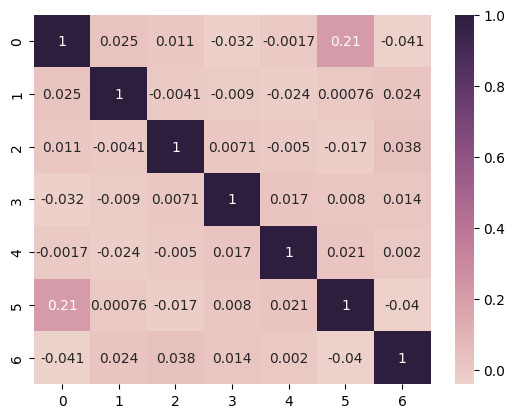

In [81]:
co_mtx = x.corr(numeric_only=True)
co_mtx = co_mtx.to_numpy()
print(co_mtx.shape)

co_mtx1=co_mtx[:7, :7]

print(co_mtx1.shape)
print(co_mtx1)

sns.heatmap(co_mtx1, cmap=sns.cubehelix_palette(as_cmap=True), annot=True)

plt.show()

(7, 7)
[[ 1.00000000e+00  5.08313890e-04 -4.98569562e-02 -8.27759817e-03
  -1.73213826e-02 -6.78435260e-03 -3.59347333e-03]
 [ 5.08313890e-04  1.00000000e+00 -4.78297051e-04  1.79597554e-02
  -3.97229000e-02  3.32516974e-02 -4.71825924e-02]
 [-4.98569562e-02 -4.78297051e-04  1.00000000e+00  4.28606410e-02
  -1.88607988e-02 -7.13346244e-02 -1.78605059e-02]
 [-8.27759817e-03  1.79597554e-02  4.28606410e-02  1.00000000e+00
   6.61634688e-03 -2.14759103e-02 -3.84970187e-02]
 [-1.73213826e-02 -3.97229000e-02 -1.88607988e-02  6.61634688e-03
   1.00000000e+00  1.75367910e-02  6.79566176e-02]
 [-6.78435260e-03  3.32516974e-02 -7.13346244e-02 -2.14759103e-02
   1.75367910e-02  1.00000000e+00  2.43599530e-02]
 [-3.59347333e-03 -4.71825924e-02 -1.78605059e-02 -3.84970187e-02
   6.79566176e-02  2.43599530e-02  1.00000000e+00]]


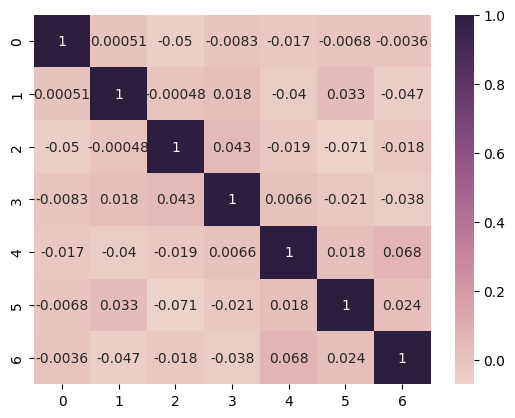

In [82]:
co_mtx2=co_mtx[7:14, 7:14]

print(co_mtx2.shape)
print(co_mtx2)

sns.heatmap(co_mtx2, cmap=sns.cubehelix_palette(as_cmap=True), annot=True)

plt.show()

(7, 7)
[[ 1.00000000e+00  3.48136261e-02  1.49515216e-01  6.08928540e-03
  -2.72685864e-02  2.58734361e-02  5.40767670e-03]
 [ 3.48136261e-02  1.00000000e+00  1.75213534e-02  2.14311446e-02
  -6.42934595e-03 -4.08532934e-03 -3.43228302e-02]
 [ 1.49515216e-01  1.75213534e-02  1.00000000e+00 -2.07858214e-02
  -1.02383094e-02  5.27330486e-02  3.00754751e-02]
 [ 6.08928540e-03  2.14311446e-02 -2.07858214e-02  1.00000000e+00
  -5.43282665e-03  4.84928029e-02 -4.48670722e-04]
 [-2.72685864e-02 -6.42934595e-03 -1.02383094e-02 -5.43282665e-03
   1.00000000e+00 -4.04900811e-02  7.52774782e-03]
 [ 2.58734361e-02 -4.08532934e-03  5.27330486e-02  4.84928029e-02
  -4.04900811e-02  1.00000000e+00 -4.59524907e-02]
 [ 5.40767670e-03 -3.43228302e-02  3.00754751e-02 -4.48670722e-04
   7.52774782e-03 -4.59524907e-02  1.00000000e+00]]


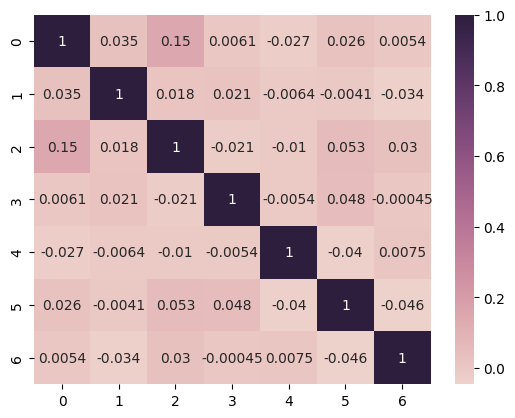

In [83]:
co_mtx3=co_mtx[14:21, 14:21]

print(co_mtx3.shape)
print(co_mtx3)

sns.heatmap(co_mtx3, cmap=sns.cubehelix_palette(as_cmap=True), annot=True)

plt.show()

(6, 6)
[[ 1.         -0.03566157  0.00100765  0.46036464  0.40485776 -0.46030095]
 [-0.03566157  1.          0.02807221 -0.0057375  -0.00206654  0.04527472]
 [ 0.00100765  0.02807221  1.          0.0498565   0.00894125 -0.0208766 ]
 [ 0.46036464 -0.0057375   0.0498565   1.          0.54805625 -0.29766758]
 [ 0.40485776 -0.00206654  0.00894125  0.54805625  1.         -0.21489785]
 [-0.46030095  0.04527472 -0.0208766  -0.29766758 -0.21489785  1.        ]]


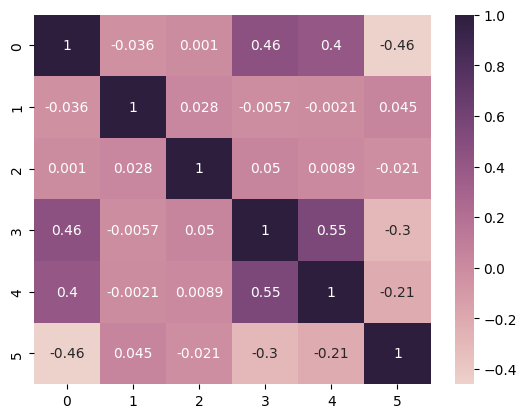

In [84]:
co_mtx4=co_mtx[21:28, 21:28]

print(co_mtx4.shape)
print(co_mtx4)

sns.heatmap(co_mtx4, cmap=sns.cubehelix_palette(as_cmap=True), annot=True)

plt.show()

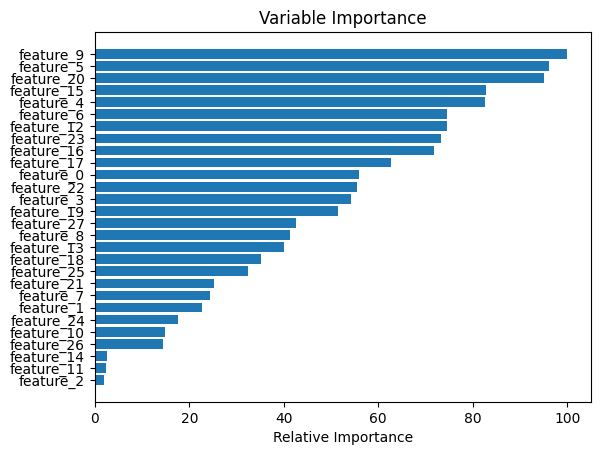

In [85]:
import numpy as np
%matplotlib inline 

data = np.random.rand(100, 28)
column_names = [f'feature_{i}' for i in range(28)]
x = pd.DataFrame(data, columns=column_names)

class MockModel:
    def __init__(self, num_features):
        self.feature_importances_ = np.random.rand(num_features)

model = MockModel(len(x.columns))

feature_importance = model.feature_importances_

feature_importance = 100 * (feature_importance/ feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0])+.5

plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, np.array(x.columns)[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

In [86]:
df.columns.tolist()[14]

'JobLevel'

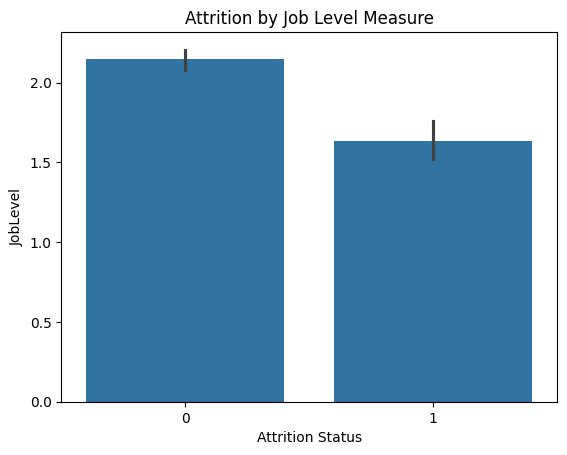

In [87]:
turbo = df[['JobLevel', 'Attrition']]
sns.barplot(x='Attrition', y='JobLevel', data=turbo)
plt.title('Attrition by Job Level Measure') 
plt.xlabel('Attrition Status')
plt.ylabel('JobLevel')
plt.show()

In [88]:
df.columns.tolist()[25]

'RelationshipSatisfaction'

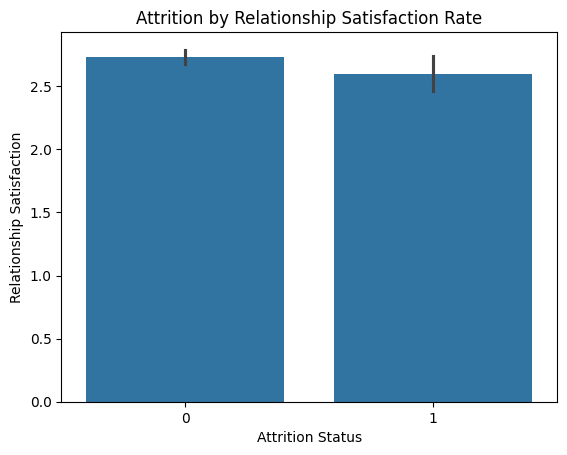

In [89]:
turbo = df[['RelationshipSatisfaction', 'Attrition']]
sns.barplot(x='Attrition', y='RelationshipSatisfaction', data=turbo)
plt.title('Attrition by Relationship Satisfaction Rate') 
plt.xlabel('Attrition Status')
plt.ylabel('Relationship Satisfaction')
plt.show()

In [90]:
df.columns.tolist()[10]

'EnvironmentSatisfaction'

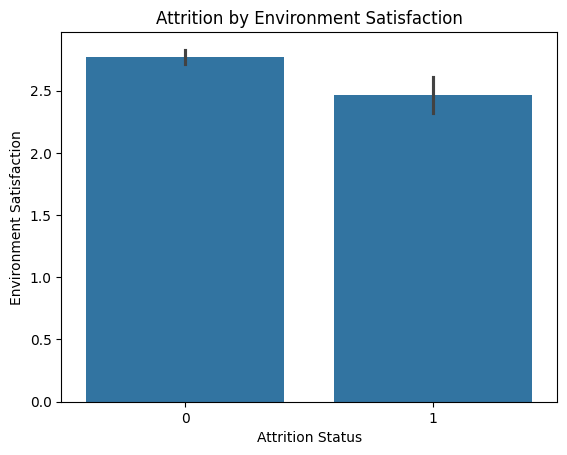

In [91]:
turbo = df[['EnvironmentSatisfaction', 'Attrition']]
sns.barplot(x='Attrition', y='EnvironmentSatisfaction', data=turbo)
plt.title('Attrition by Environment Satisfaction') 
plt.xlabel('Attrition Status')
plt.ylabel('Environment Satisfaction')
plt.show()

In [92]:
df.columns.tolist()[27]

'StockOptionLevel'

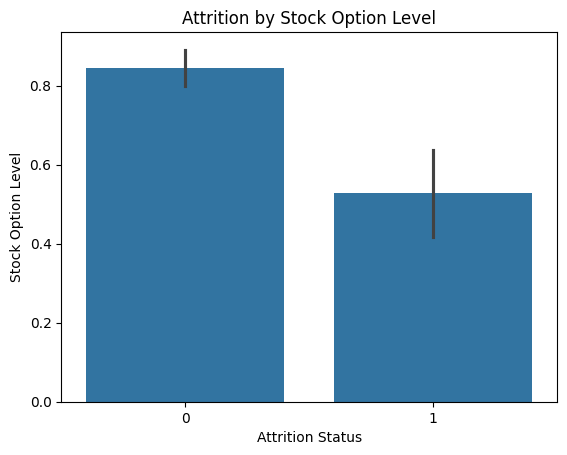

In [93]:
turbo = df[['StockOptionLevel', 'Attrition']]
sns.barplot(x='Attrition', y='StockOptionLevel', data=turbo)
plt.title('Attrition by Stock Option Level') 
plt.xlabel('Attrition Status')
plt.ylabel('Stock Option Level')
plt.show()

In [ ]:
# Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsInCurrentRole,YearsSinceLastPromotion
# above listed are all the parameters used in the prediction of the model